In [3]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [2]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.6/150.0 MB 16.7 MB/s eta 0:00:09
   - -------------------------------------- 6.6/150.0 MB 18.3 MB/s eta 0:00:08
   -- ------------------------------------- 10.0/150.0 MB 18.8 MB/s eta 0:00:08
   -- ------------------------------------- 10.7/150.0 MB 14.9 MB/s eta 0:00:10
   --- ------------------------------------ 11.8/150.0 MB 12.3 MB/s eta 0:00:12
   --- ------------------------------------ 11.8/150.0 MB 12.3 MB/s eta 0:00:12
   --- ------------------------------------ 12.1/150.0 MB 8.5 MB/s eta 0:00:17
   --- ------------------------------------ 12.3/150.0 MB 7.6 MB/s eta 0:00:19
   --- ------------------------------------ 12.3/150.0 MB 7.6 MB/s eta 0:00:19
   --- ------------------------------------ 13.6/150.0 MB 6.6 MB/s eta 0:00:21
   ---- ----------------------------------- 17.0/150.0 MB 7.5 MB/s eta 0:00:18
   ----- ---------------------------------- 21.5/150.0 M

In [4]:
from sklearn.datasets import make_classification

# Generate synthetic classification data
X, y = make_classification(n_samples=10000, n_features=20, 
                            n_informative=15, n_redundant=5, 
                            random_state=42)

# Split into train/test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Train GBM
gbm = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5
)

start_time = time.time()
gbm.fit(X_train, y_train)
gbm_time = time.time() - start_time

# Predict
y_pred_gbm = gbm.predict(X_val)
gbm_acc = accuracy_score(y_val, y_pred_gbm)

print(f"GBM Accuracy: {gbm_acc:.4f}")
print(f"GBM Training Time: {gbm_time:.2f} seconds")

GBM Accuracy: 0.9543
GBM Training Time: 28.75 seconds


In [18]:
# Train XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

start_time = time.time()
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)
xgb_time = time.time() - start_time

# Predict
y_pred_xgb = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, y_pred_xgb)

print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(f"XGBoost Training Time: {xgb_time:.2f} seconds")

C:\Users\saket.khopkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:33:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9153
XGBoost Training Time: 0.61 seconds


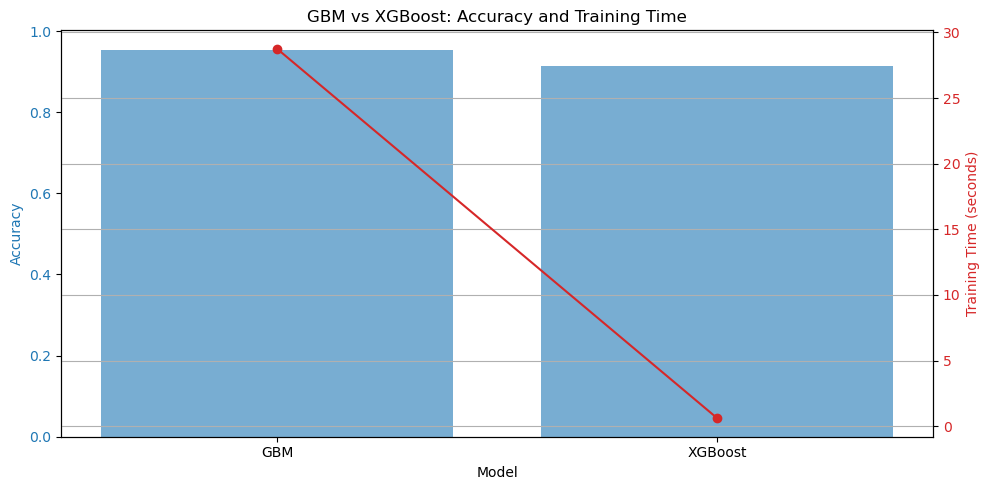

In [19]:
# Plotting comparison
models = ['GBM', 'XGBoost']
accuracy = [gbm_acc, xgb_acc]
training_time = [gbm_time, xgb_time]

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(models, accuracy, color=color, alpha=0.6, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Training Time (seconds)', color=color)
ax2.plot(models, training_time, color=color, marker='o', label='Training Time')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('GBM vs XGBoost: Accuracy and Training Time')
fig.tight_layout()
plt.grid(True)
plt.show()

Early Stopping and Learning Curves

In [20]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Sample dataset
df = pd.DataFrame({
    'Square_Feet': [1000, 1500, 2000, 1200, 2500, 1800],
    'Bedrooms': [2, 3, 4, 2, 5, 3],
    'Location_Score': [3, 4, 5, 3, 5, 4],
    'High_Price': [0, 0, 1, 0, 1, 1]
})

X = df[['Square_Feet', 'Bedrooms', 'Location_Score']]
y = df['High_Price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
print(df)

   Square_Feet  Bedrooms  Location_Score  High_Price
0         1000         2               3           0
1         1500         3               4           0
2         2000         4               5           1
3         1200         2               3           0
4         2500         5               5           1
5         1800         3               4           1


In [27]:
model = xgb.XGBClassifier(
    n_estimators=1000,         # Very large number
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=10   # This works though!!
)

# Train with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    # early_stopping_rounds=10,   # Stop if no improvement in 10 rounds - this parameter is causing me problems, so commenting out
    verbose=True
)

[0]	validation_0-logloss:1.38629
[1]	validation_0-logloss:1.38629
[2]	validation_0-logloss:1.38629
[3]	validation_0-logloss:1.38629
[4]	validation_0-logloss:1.38629
[5]	validation_0-logloss:1.38629
[6]	validation_0-logloss:1.38629
[7]	validation_0-logloss:1.38629
[8]	validation_0-logloss:1.38629
[9]	validation_0-logloss:1.38629


C:\Users\saket.khopkar\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

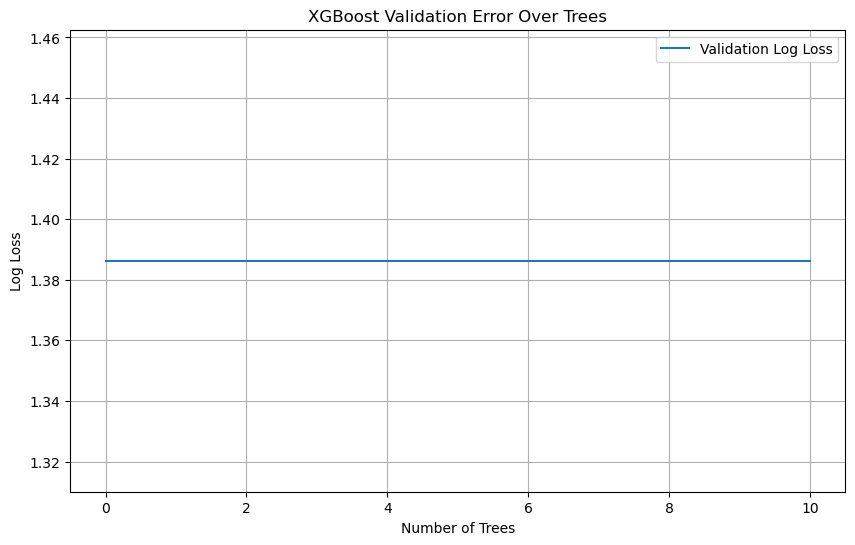

In [26]:
results = model.evals_result()

# Plot
plt.figure(figsize=(10,6))
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.plot(x_axis, results['validation_0']['logloss'], label='Validation Log Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('XGBoost Validation Error Over Trees')
plt.legend()
plt.grid(True)
plt.show()